In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r'Dataset\Train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10411 files belonging to 6 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'Dataset\Val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3053 files belonging to 6 classes.


In [7]:
training_set
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
])

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [5]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
    data_augmentation,
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),  # Flatten the output of the convolutional layers
    tf.keras.layers.Dense(units=1500, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=6, activation='softmax')
])


In [6]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 128)       73856     
          

In [8]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


326/326 [==============================] - 803s 2s/step - loss: 1.0034 - accuracy: 0.6150 - val_loss: 0.6265 - val_accuracy: 0.7753
Epoch 2/10
326/326 [==============================] - 754s 2s/step - loss: 0.4632 - accuracy: 0.8320 - val_loss: 0.2799 - val_accuracy: 0.8981
Epoch 3/10
326/326 [==============================] - 763s 2s/step - loss: 0.3083 - accuracy: 0.8895 - val_loss: 0.2380 - val_accuracy: 0.9168
Epoch 4/10
326/326 [==============================] - 758s 2s/step - loss: 0.2439 - accuracy: 0.9161 - val_loss: 0.2369 - val_accuracy: 0.9112
Epoch 5/10
326/326 [==============================] - 753s 2s/step - loss: 0.1829 - accuracy: 0.9362 - val_loss: 0.2729 - val_accuracy: 0.9129
Epoch 6/10
326/326 [==============================] - 745s 2s/step - loss: 0.1444 - accuracy: 0.9474 - val_loss: 0.1614 - val_accuracy: 0.9433
Epoch 7/10
326/326 [==============================] - 748s 2s/step - loss: 0.1176 - accuracy: 0.9590 - val_loss: 0.2038 - val_accuracy: 0.93

In [9]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

326/326 [==============================] - 192s 589ms/step - loss: 0.0658 - accuracy: 0.9777
Training accuracy: 0.9777158498764038


In [10]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

96/96 [==============================] - 56s 576ms/step - loss: 0.1603 - accuracy: 0.9466
Validation accuracy: 0.9466099143028259


In [13]:
cnn.save(r'C:\Users\Sai\Desktop\mini project\trained_tomato_plant_disease_updated_model.h5')

In [14]:
training_history.history

{'loss': [1.0034416913986206,
  0.46321865916252136,
  0.308268666267395,
  0.24386726319789886,
  0.18285000324249268,
  0.1444358080625534,
  0.11758524179458618,
  0.10143875330686569,
  0.09337951987981796,
  0.06322896480560303],
 'accuracy': [0.615022599697113,
  0.8320046067237854,
  0.889539897441864,
  0.9161463975906372,
  0.9362213015556335,
  0.9473633766174316,
  0.9589856863021851,
  0.96340411901474,
  0.9660935401916504,
  0.9777158498764038],
 'val_loss': [0.6264567375183105,
  0.2799275517463684,
  0.23801106214523315,
  0.2369416356086731,
  0.27288517355918884,
  0.1613825559616089,
  0.20379118621349335,
  0.14827047288417816,
  0.16289550065994263,
  0.16033999621868134],
 'val_accuracy': [0.7753030061721802,
  0.8981329798698425,
  0.9168031215667725,
  0.9112348556518555,
  0.9128726124763489,
  0.9433344006538391,
  0.933508038520813,
  0.9570913910865784,
  0.9489027261734009,
  0.9466099143028259]}

In [15]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [16]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


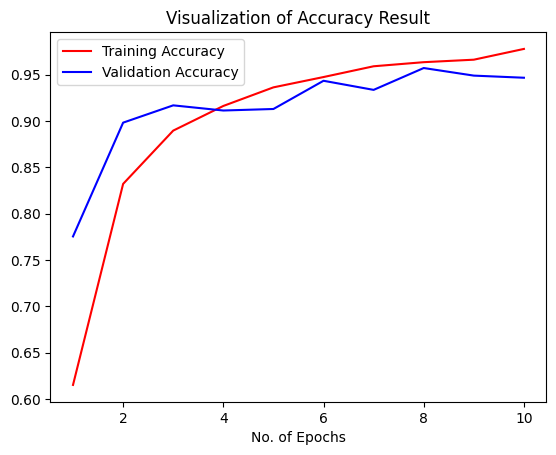

In [17]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

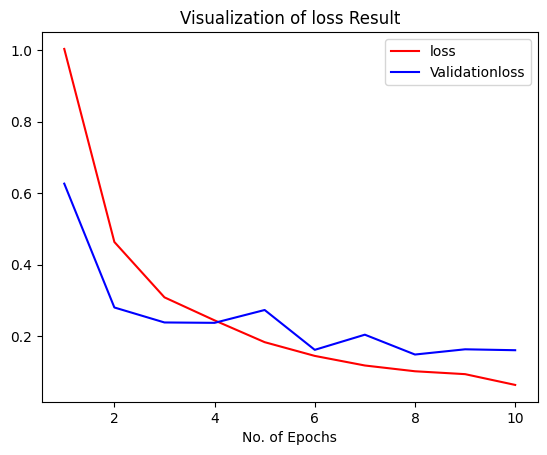

In [18]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['loss'],color='red',label='loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validationloss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of loss Result')
plt.legend()
plt.show()

In [19]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r'Dataset\Val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 3053 files belonging to 6 classes.
['Bacterial Spot', 'Early Blight', 'Healthy', 'Late Blight', 'Septoria Leaf Spot', 'Yellow Leaf Curl Virus']


In [20]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

3053/3053 [==============================] - 110s 36ms/step


In [21]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [22]:
Y_true

<tf.Tensor: shape=(3053,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5], dtype=int64)>

In [23]:
predicted_categories

<tf.Tensor: shape=(3053,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5], dtype=int64)>

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [25]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                        precision    recall  f1-score   support

        Bacterial Spot       0.91      0.99      0.95       467
          Early Blight       0.91      0.94      0.93       528
               Healthy       0.97      1.00      0.99       530
           Late Blight       0.94      0.89      0.92       509
    Septoria Leaf Spot       0.95      0.94      0.94       480
Yellow Leaf Curl Virus       0.99      0.92      0.96       539

              accuracy                           0.95      3053
             macro avg       0.95      0.95      0.95      3053
          weighted avg       0.95      0.95      0.95      3053



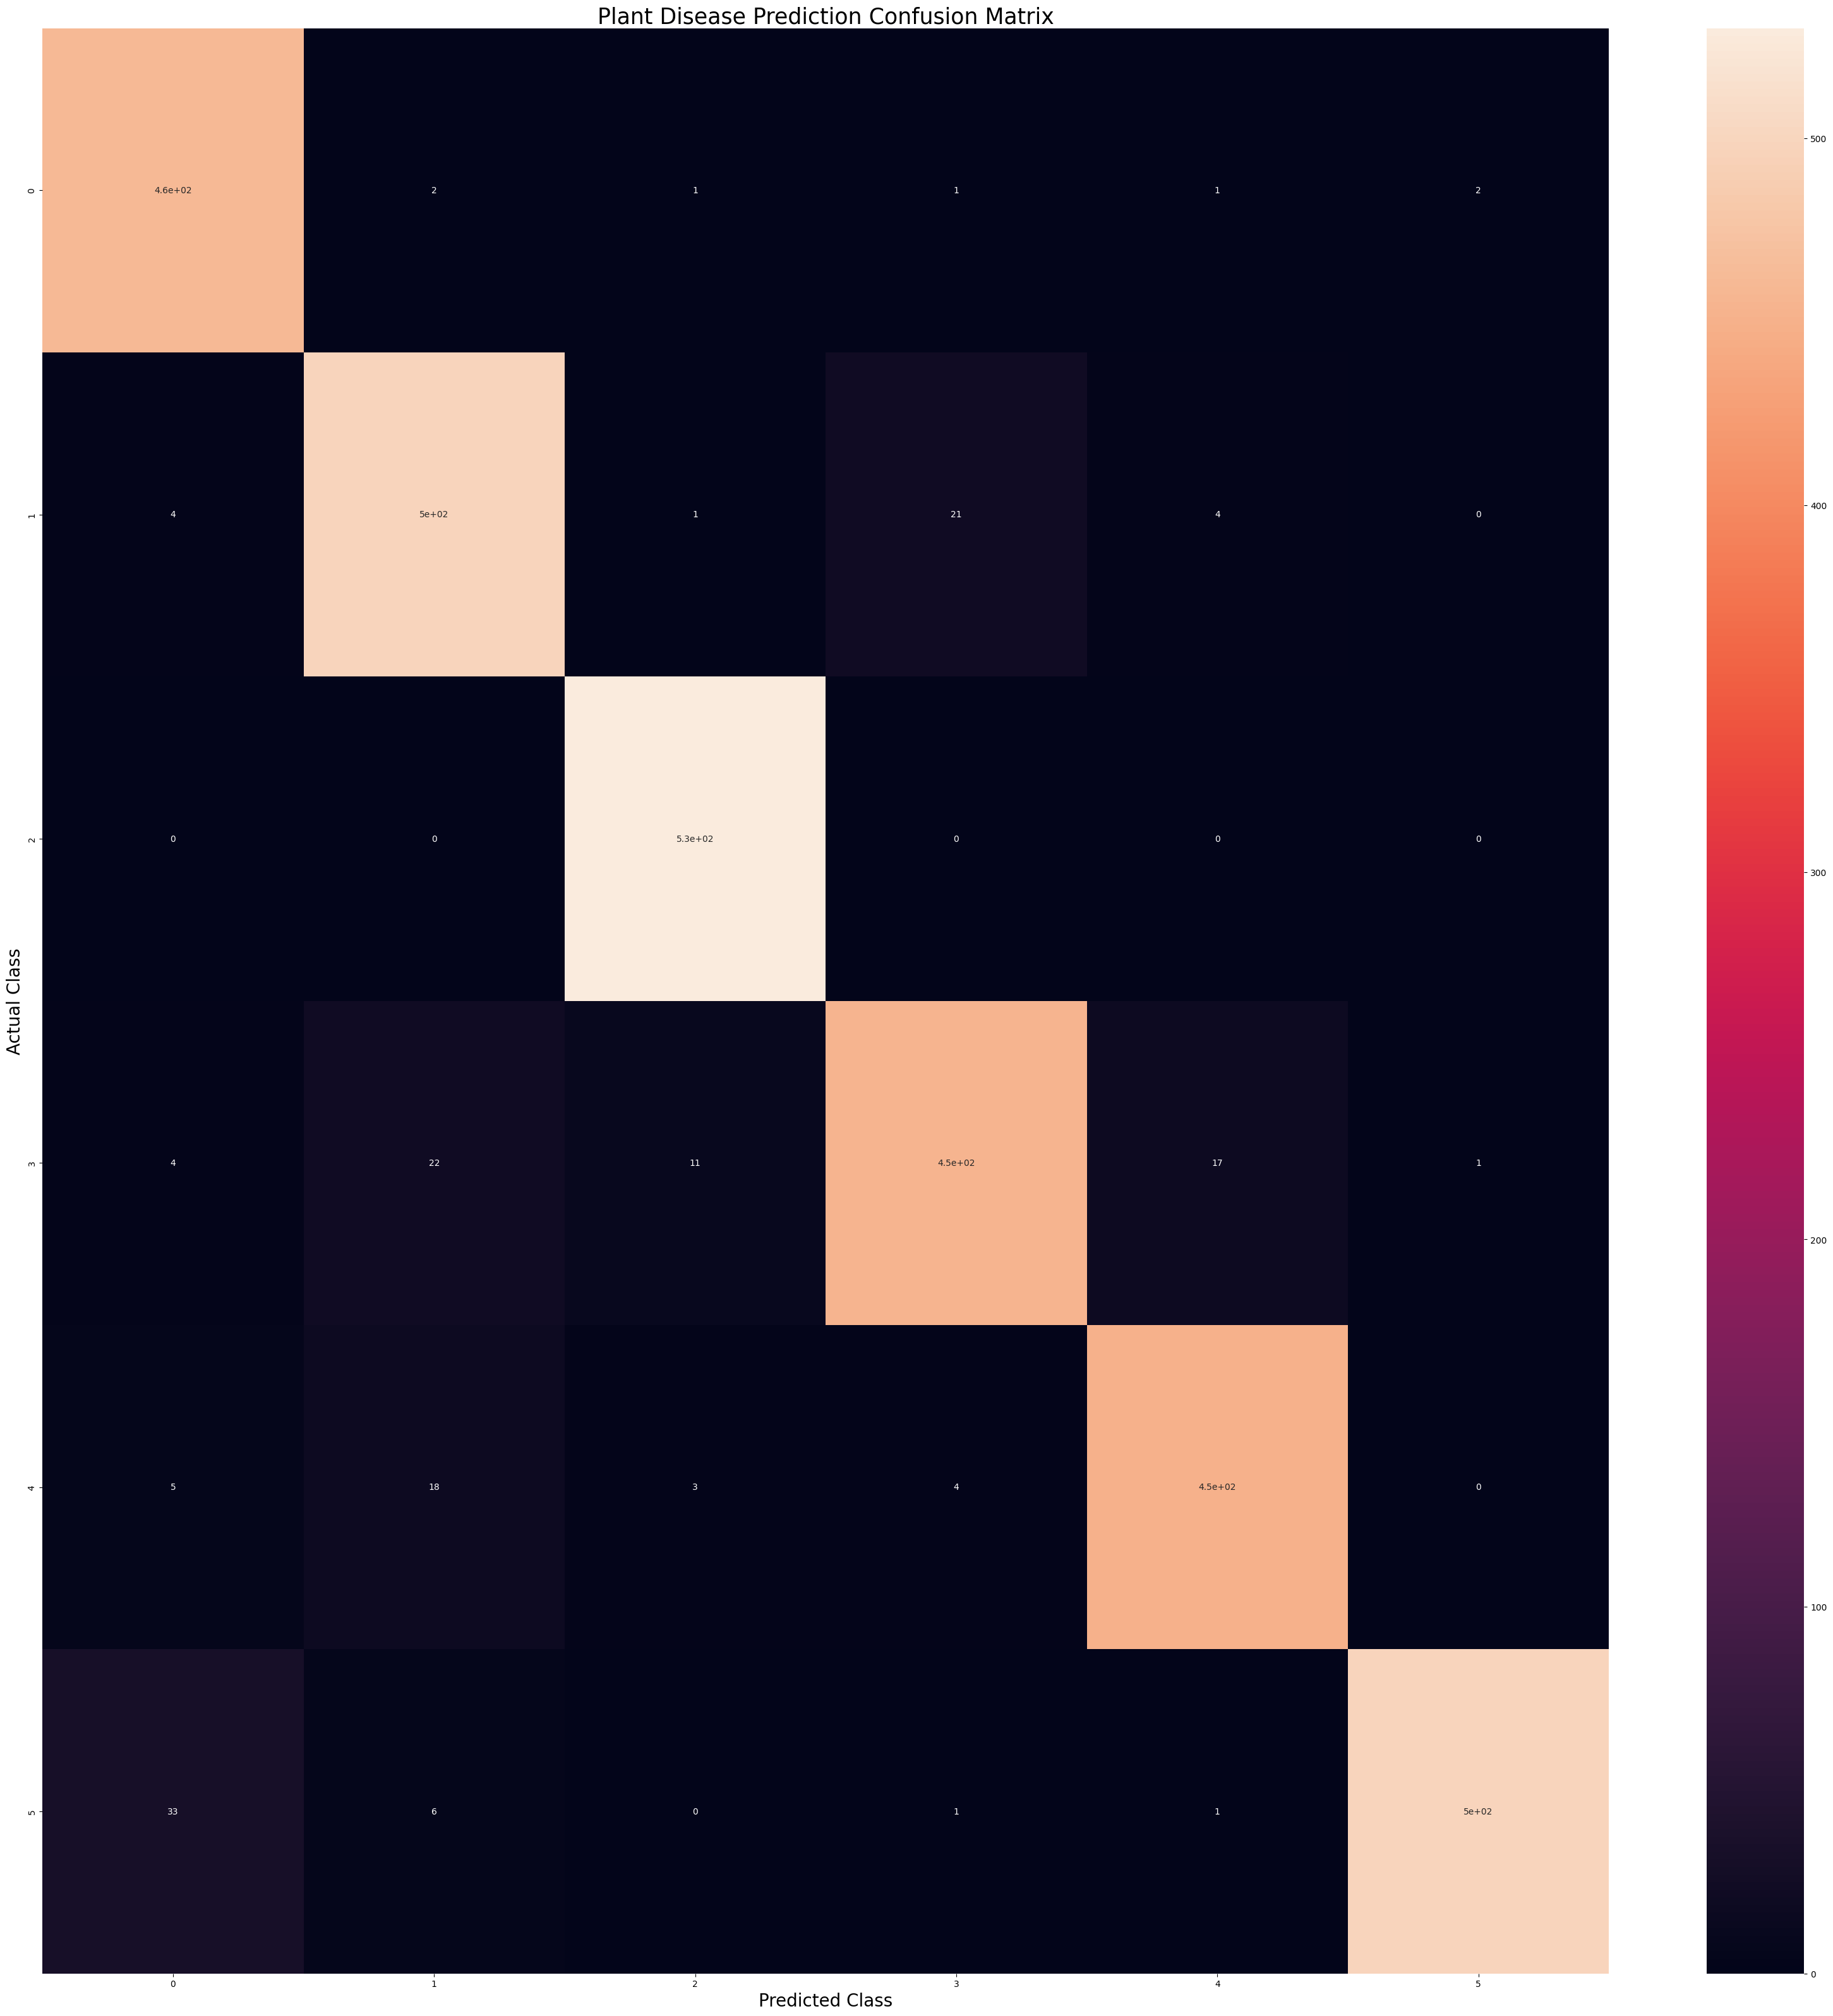

In [26]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()